# **MICE : Multivariate Imputaion by Chained Equation**

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,MissingIndicator , KNNImputer , IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder  , StandardScaler

In [187]:
df = pd.read_csv("/content/data_science_job.csv" , usecols= ["experience","training_hours","target","city_development_index"])
df.head()

,city_development_index,experience,training_hours,target
0,0.920,20.0,36.0,1.0
1,0.776,15.0,47.0,0.0
2,0.624,5.0,83.0,0.0
3,0.789,0.0,52.0,1.0
4,0.767,20.0,8.0,0.0


In [188]:
X = df.drop(columns=["target"])
y = df["target"]

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
item_imputer = IterativeImputer(max_iter = 100 , random_state= 0 , estimator= LinearRegression())
X_trf = item_imputer.fit_transform(X)

In [191]:
X_trf = pd.DataFrame(X_trf , columns=X.columns)

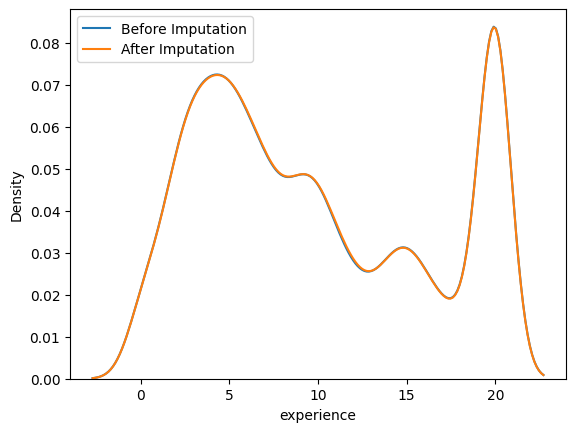

In [192]:
sns.kdeplot(X["experience"] , label = "Before Imputation")
sns.kdeplot(X_trf["experience"] , label = "After Imputation")
plt.legend()
plt.show()

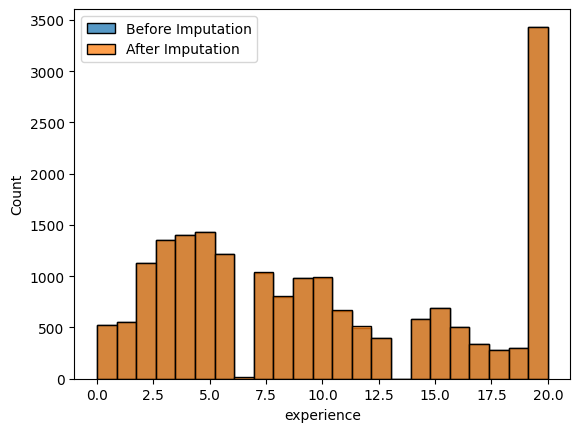

In [193]:
sns.histplot(X["experience"] , label = "Before Imputation")
sns.histplot(X_trf["experience"] , label = "After Imputation")
plt.legend()
plt.show()

In [194]:
X_trf.columns = ["city_development_index_trf","experience_trf","training_hours_trf"]

In [195]:
X_trf.head()

,city_development_index_trf,experience_trf,training_hours_trf
0,0.920,20.0,36.0
1,0.776,15.0,47.0
2,0.624,5.0,83.0
3,0.789,0.0,52.0
4,0.767,20.0,8.0


In [196]:
X_new = pd.concat([X,X_trf] , axis = 1)

In [197]:
X_new.head()

,city_development_index,experience,training_hours,city_development_index_trf,experience_trf,training_hours_trf
0,0.920,20.0,36.0,0.920,20.0,36.0
1,0.776,15.0,47.0,0.776,15.0,47.0
2,0.624,5.0,83.0,0.624,5.0,83.0
3,0.789,0.0,52.0,0.789,0.0,52.0
4,0.767,20.0,8.0,0.767,20.0,8.0


<Axes: >

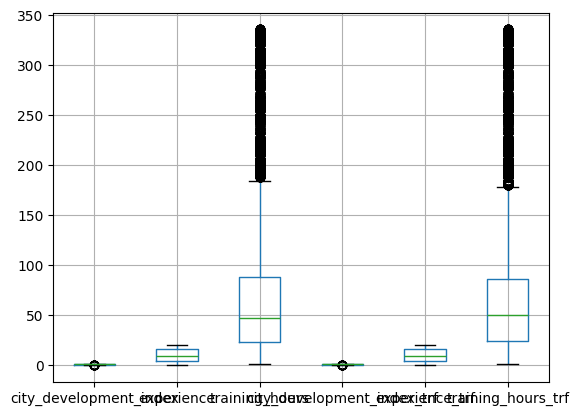

In [198]:
X_new.boxplot()

In [199]:
item_imputer.n_iter_

2

In [200]:
item_imputer.initial_imputer_

SimpleImputer()

In [201]:
item_imputer.imputation_sequence_

[_ImputerTriplet(feat_idx=1, neighbor_feat_idx=array([0, 2]), estimator=LinearRegression()),
 _ImputerTriplet(feat_idx=0, neighbor_feat_idx=array([1, 2]), estimator=LinearRegression()),
 _ImputerTriplet(feat_idx=2, neighbor_feat_idx=array([0, 1]), estimator=LinearRegression()),
 _ImputerTriplet(feat_idx=1, neighbor_feat_idx=array([0, 2]), estimator=LinearRegression()),
 _ImputerTriplet(feat_idx=0, neighbor_feat_idx=array([1, 2]), estimator=LinearRegression()),
 _ImputerTriplet(feat_idx=2, neighbor_feat_idx=array([0, 1]), estimator=LinearRegression())]